In [1]:
import numpy as np
from sklearn import preprocessing
import copy
import matplotlib.pyplot as plt

In [2]:
def activation(x):
    return 1 / (1 +  np.exp(-x))

In [3]:
def dactivation(x):
    return np.exp(-x) / ((1+np.exp(-x))**2)

In [4]:
class MLP:
    def __init__(self, *args):
        np.random.seed(123)
        self.shape = args
        n = len(args)
        self.layers = []
        self.layers.append(np.ones(self.shape[0]+1))
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,self.layers[i+1].size)))
        self.dw = [0,]*len(self.weights)
        self.reset()
    
    def reset(self):
        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*1

    def propagate_forward(self, data):
        self.layers[0][0:-1] = data
        for i in range(1,len(self.shape)):
            self.layers[i][...] = activation(np.dot(self.layers[i-1],self.weights[i-1]))

        return self.layers[-1]
    
# HW2 start process

# I made 3 new parameters: mrate (for momentum), l1_rate, l2_rate
# The default values are 0 in all cases so they don't modify the backprop unless we specify them
# For better transparency I made three separated rows for the three methods
# The calculations are equivalent with the lecture slides

    def propagate_backward(self, target, lrate=0.1, mrate=0, l1_rate=0, l2_rate=0):
        deltas = []
        error = - (target - self.layers[-1])
        delta = np.multiply(error,dactivation(np.dot(self.layers[-2],self.weights[-1])))
        deltas.append(delta)
        # Gradiens kiszámítása a rejtett réteg(ek)ben
        for i in range(len(self.shape)-2,0,-1):
            delta=np.dot(deltas[0],self.weights[i].T)*dactivation(np.dot(self.layers[i-1],self.weights[i-1]))

            deltas.insert(0,delta)
        # Súlyok módosítása
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = -lrate * np.dot(layer.T,delta)
            
            momentum = mrate * self.dw[i]
            L1_reg = -lrate * l1_rate * np.sign(self.weights[i])
            L2_reg = -lrate * l2_rate * self.weights[i]
            
            self.weights[i] += dw + momentum + L1_reg + L2_reg

            self.dw[i] = dw 

        # Visszatérés a hibával
        return (error**2).sum()
		
		
def learn(network, X, Y, valid_split, test_split, epochs=5000, lrate=0.01, mrate=0, l1_rate=0, l2_rate=0):
    
# HW2 end process

        # train-validation-test minták különválasztása
        X_train = X[0:int(nb_samples*(1-valid_split-test_split))]
        Y_train = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_valid = X[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        Y_valid = Y[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        X_test  = X[int(nb_samples*(1-test_split)):]
        Y_test  = Y[int(nb_samples*(1-test_split)):]
    
        # standardizálás
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)
		
    
        # shuffle
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
        
        randperm = np.random.permutation(len(X_valid))
        X_valid, Y_valid = X_valid[randperm], Y_valid[randperm]
        
        randperm = np.random.permutation(len(X_test))
        X_test, Y_test = X_test[randperm], Y_test[randperm]

		
        # Tanítási fázis, epoch-szor megyünk át 1-1 véltelenszerűen kiválasztott mintán.
        for i in range(epochs):
            train_err = 0
            for k in range(X_train.shape[0]):
                  network.propagate_forward(X_train[k])
                  train_err += network.propagate_backward(Y_train[k],lrate)
            train_err /= X_train.shape[0]
				

            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                o_valid[k] = network.propagate_forward(X_valid[k])
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i, train_err, valid_err))
        # Tesztelési fázis
        print("\n--- TESZTELÉS ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            o_test[k] = network.propagate_forward(X_test[k])
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (elvart eredmeny: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]

        fig1=plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.cool)

In [5]:
 network = MLP(2,10,1)

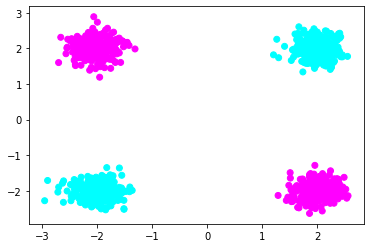

In [6]:
nb_samples=1000
X = np.zeros((nb_samples,2))
Y = np.zeros(nb_samples)
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,0.25,8)
    X[i], Y[i] = (-2+noise[0],-2+noise[1]), 0
    X[i+1], Y[i+1] = (2+noise[2],-2+noise[3]), 1
    X[i+2], Y[i+2] = (-2+noise[4],2+noise[5]), 1
    X[i+3], Y[i+3] = (2+noise[6],2+noise[7]), 0
fig1=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.cool)

0 epoch, train_err: 0.2587, valid_err: 0.2449
1 epoch, train_err: 0.2436, valid_err: 0.2408
2 epoch, train_err: 0.2409, valid_err: 0.2388
3 epoch, train_err: 0.2388, valid_err: 0.2368
4 epoch, train_err: 0.2366, valid_err: 0.2347
5 epoch, train_err: 0.2343, valid_err: 0.2324
6 epoch, train_err: 0.2319, valid_err: 0.2300
7 epoch, train_err: 0.2294, valid_err: 0.2274
8 epoch, train_err: 0.2267, valid_err: 0.2247
9 epoch, train_err: 0.2238, valid_err: 0.2217
10 epoch, train_err: 0.2206, valid_err: 0.2185
11 epoch, train_err: 0.2172, valid_err: 0.2150
12 epoch, train_err: 0.2135, valid_err: 0.2112
13 epoch, train_err: 0.2096, valid_err: 0.2071
14 epoch, train_err: 0.2053, valid_err: 0.2028
15 epoch, train_err: 0.2007, valid_err: 0.1981
16 epoch, train_err: 0.1958, valid_err: 0.1930
17 epoch, train_err: 0.1906, valid_err: 0.1877
18 epoch, train_err: 0.1850, valid_err: 0.1820
19 epoch, train_err: 0.1792, valid_err: 0.1761
20 epoch, train_err: 0.1731, valid_err: 0.1700
21 epoch, train_err: 0.

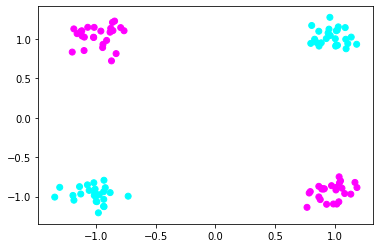

In [7]:
network.reset()
learn(network,X, Y, 0.2, 0.1,100,0.01,0.4)